In [6]:
import os
os.getcwd()

'C:\\Users\\jaswa'

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
## Set Path Here before running the code
WORKING_DIRECTORY = "C:/Users/jaswa/OneDrive/Desktop/19MIS0134/datasets/RECENT ALZ DATA SET/Dataset/"



##  Name of classes
CLASSES = ['Mild_Demented',
           'Moderate_Demented',
           'Non_Demented',
           'Very_Mild_Demented']

In [107]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(150, 150),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

class_distribution = Counter(np.argmax(y, axis=1))
print("Class Distribution:", class_distribution)

Found 6400 images belonging to 4 classes.
Class Distribution: Counter({2: 3200, 3: 2240, 0: 896, 1: 64})


In [21]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 632), (1, 46), (2, 2228), (3, 1574)]
Validation	 [(0, 205), (1, 14), (2, 770), (3, 547)]
Test      	 [(0, 59), (1, 4), (2, 202), (3, 119)]


In [22]:
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 896), (1, 64), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4480, 150, 150, 3)
y_train shape: (4480, 4)
X_test shape: (384, 150, 150, 3)
y_test shape: (384, 4)


<h1>Dataset Sample</h1>

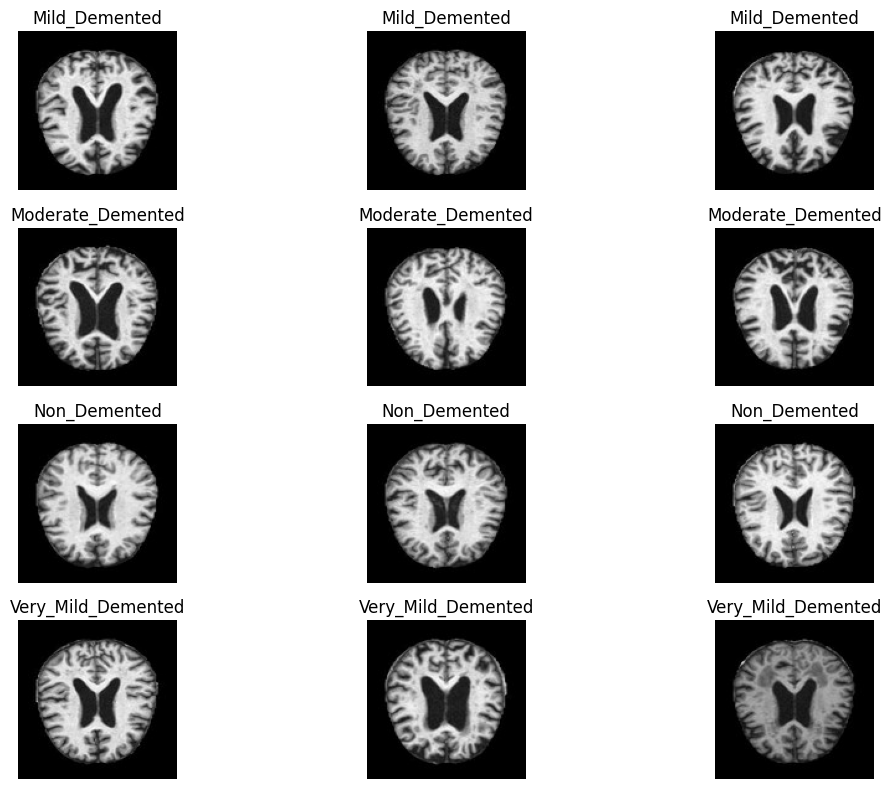

In [95]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing your dataset
dataset_directory = "C:\\Users\\jaswa\\OneDrive\\Desktop\\19MIS0134\\datasets\\RECENT ALZ DATA SET/Dataset"

# List of classes in your dataset
classes = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Number of images to display per class
num_images_per_class = 3

# Display sample images from each class
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes):
    class_directory = os.path.join(dataset_directory, class_name)
    image_files = os.listdir(class_directory)[:num_images_per_class]
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_directory, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(len(classes), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Data preprocessing using edge detection</h1>

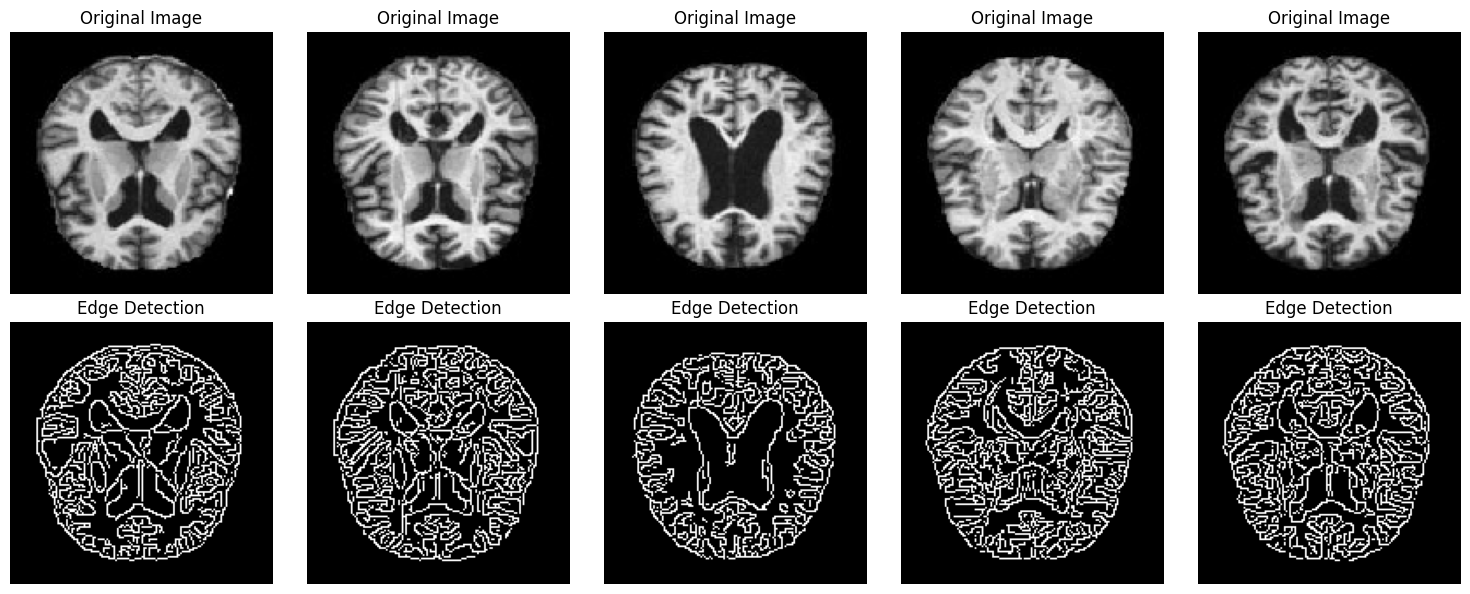

In [100]:
import cv2
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Display original images
plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test[i])
    plt.title('Original Image')
    plt.axis('off')

# Display edge-detected images
for i in range(num_images):
    # Convert the original image to grayscale
    gray_image = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)

    # Normalize the grayscale image
    normalized_gray_image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Convert the normalized grayscale image to 8-bit unsigned integer
    normalized_gray_image_uint8 = normalized_gray_image.astype(np.uint8)

    # Apply Canny edge detection with adjusted parameters
    edges = cv2.Canny(normalized_gray_image_uint8, 50, 150)

    # Display the edge-detected image
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

plt.tight_layout()
plt.show()


# LeNet

In [24]:
# Define the model architecture (LeNet)
model_lenet = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes in the output layer
])

In [102]:
# Compile the model
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18496)             0         
                                                                 
 dense (Dense)               (None, 120)               2

## LeNet Training...

In [26]:
# Train the model with reshaped labels
history_lenet = model_lenet.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
140/140 [==============================] - 54s 257ms/step - loss: 0.9862 - accuracy: 0.5437 - val_loss: 0.8934 - val_accuracy: 0.5807
Epoch 2/50
140/140 [==============================] - 39s 275ms/step - loss: 0.6931 - accuracy: 0.7045 - val_loss: 0.6806 - val_accuracy: 0.7318
Epoch 3/50
140/140 [==============================] - 39s 276ms/step - loss: 0.3436 - accuracy: 0.8777 - val_loss: 0.4173 - val_accuracy: 0.8151
Epoch 4/50
140/140 [==============================] - 38s 275ms/step - loss: 0.1528 - accuracy: 0.9480 - val_loss: 0.1694 - val_accuracy: 0.9375
Epoch 5/50
140/140 [==============================] - 39s 280ms/step - loss: 0.0527 - accuracy: 0.9871 - val_loss: 0.1383 - val_accuracy: 0.9583
Epoch 6/50
140/140 [==============================] - 40s 283ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.1573 - val_accuracy: 0.9427
Epoch 7/50
140/140 [==============================] - 40s 288ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 0.1037 - val_ac

In [27]:
# Evaluate the model on the test set
test_loss_lenet, test_accuracy_lenet = model_lenet.evaluate(X_test, y_test)

12/12 [==============================] - 1s 53ms/step - loss: 0.0782 - accuracy: 0.9818


In [28]:
print(f"LeNet Test Accuracy: {test_accuracy_lenet}, Test Loss: {test_loss_lenet}")

LeNet Test Accuracy: 0.9817708134651184, Test Loss: 0.07817886769771576


12/12 [==============================] - 1s 56ms/step


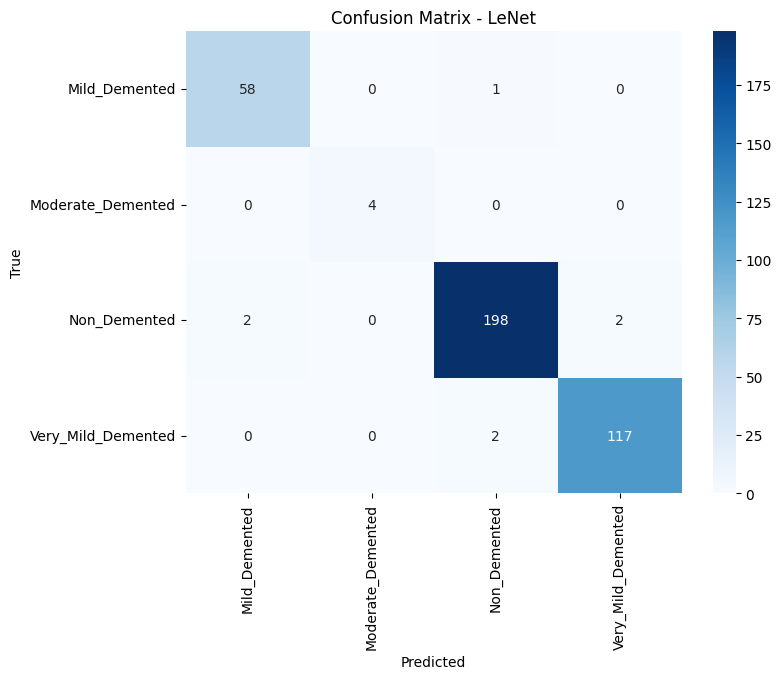

In [62]:

# Get the predicted probabilities from the model
y_pred_prob_lenet = model_lenet.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_lenet = np.argmax(y_pred_prob_lenet, axis=1)

# Convert true labels to class labels
y_true_lenet = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_lenet = confusion_matrix(y_true_lenet, y_pred_lenet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lenet, annot=True, cmap='Blues', fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix - LeNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# UNet

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, Input, concatenate, Flatten, Dense

In [30]:
# Define the model architecture (simplified U-Net)
def create_unet(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    flat = Flatten()(pool2)
    dense1 = Dense(128, activation='relu')(flat)
    outputs = Dense(4, activation='softmax')(dense1)  # 4 classes in the output layer

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [31]:
# Create U-Net model
model_unet = create_unet(input_shape=(150, 150, 3))

In [103]:
# Compile the model
model_unet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_unet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0     

## UNet Training

In [33]:
# Train the model
history_unet = model_unet.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
140/140 [==============================] - 86s 602ms/step - loss: 1.0378 - accuracy: 0.5208 - val_loss: 0.8997 - val_accuracy: 0.5632
Epoch 2/50
140/140 [==============================] - 84s 596ms/step - loss: 0.6763 - accuracy: 0.7147 - val_loss: 0.5063 - val_accuracy: 0.7975
Epoch 3/50
140/140 [==============================] - 83s 593ms/step - loss: 0.3007 - accuracy: 0.8879 - val_loss: 0.2975 - val_accuracy: 0.8770
Epoch 4/50
140/140 [==============================] - 85s 611ms/step - loss: 0.1337 - accuracy: 0.9558 - val_loss: 0.1794 - val_accuracy: 0.9349
Epoch 5/50
140/140 [==============================] - 85s 605ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.1081 - val_accuracy: 0.9551
Epoch 6/50
140/140 [==============================] - 82s 589ms/step - loss: 0.0108 - accuracy: 0.9991 - val_loss: 0.0675 - val_accuracy: 0.9753
Epoch 7/50
140/140 [==============================] - 82s 585ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0753 - val_ac

In [34]:
# Evaluate the model on the test set
test_loss_unet, test_accuracy_unet = model_unet.evaluate(X_test, y_test)

12/12 [==============================] - 1s 100ms/step - loss: 0.0719 - accuracy: 0.9714


## UNet Test-Accuracy and Test-Loss

In [35]:
print(f"U-Net Test Accuracy: {test_accuracy_unet}, Test Loss: {test_loss_unet}")

U-Net Test Accuracy: 0.9713541865348816, Test Loss: 0.07186392694711685


12/12 [==============================] - 1s 112ms/step


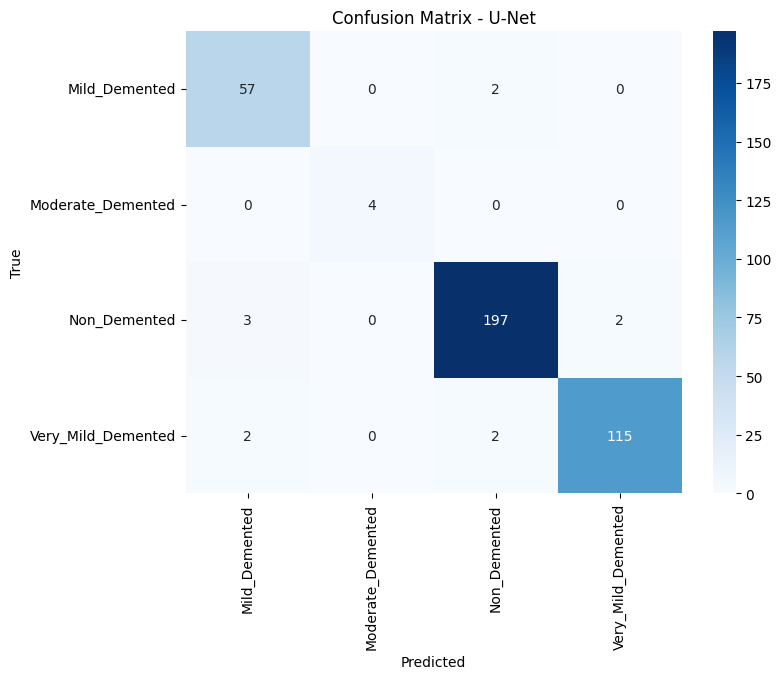

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted probabilities from the model
y_pred_prob_unet = model_unet.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_unet = np.argmax(y_pred_prob_unet, axis=1)

# Convert true labels to class labels
y_true_unet = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_unet = confusion_matrix(y_true_unet, y_pred_unet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unet, annot=True, cmap='Blues', fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix - U-Net')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# GoogLeNet

In [36]:
from tensorflow.keras.applications import InceptionV3

# Create InceptionV3 model
model_googlenet = InceptionV3(input_shape=(150, 150, 3), weights=None, classes=4)


In [104]:
# Compile the model
model_googlenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_googlenet.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

## GoogLe-Net Training...

In [38]:
# Training with EarlyStopping
history_googlenet = model_googlenet.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
140/140 [==============================] - 471s 3s/step - loss: 1.0743 - accuracy: 0.5297 - val_loss: 1.4865 - val_accuracy: 0.3561
Epoch 2/50
140/140 [==============================] - 453s 3s/step - loss: 0.8122 - accuracy: 0.6411 - val_loss: 1.3082 - val_accuracy: 0.3561
Epoch 3/50
140/140 [==============================] - 485s 3s/step - loss: 0.6146 - accuracy: 0.7482 - val_loss: 1.1388 - val_accuracy: 0.4544
Epoch 4/50
140/140 [==============================] - 496s 4s/step - loss: 0.4982 - accuracy: 0.8109 - val_loss: 0.9750 - val_accuracy: 0.6699
Epoch 5/50
140/140 [==============================] - 469s 3s/step - loss: 0.3596 - accuracy: 0.8705 - val_loss: 4.5716 - val_accuracy: 0.3568
Epoch 6/50
140/140 [==============================] - 461s 3s/step - loss: 0.2916 - accuracy: 0.8904 - val_loss: 3.1607 - val_accuracy: 0.4388
Epoch 7/50
140/140 [==============================] - 473s 3s/step - loss: 0.2077 - accuracy: 0.9185 - val_loss: 5.6780 - val_accuracy: 0.1816

In [39]:
# Evaluate the model on the test set
test_loss_googlenet, test_accuracy_googlenet = model_googlenet.evaluate(X_test, y_test)

12/12 [==============================] - 5s 420ms/step - loss: 0.8867 - accuracy: 0.6875


In [40]:
print(f"GoogLeNet Test Accuracy: {test_accuracy_unet}, Test Loss: {test_loss_unet}")

GoogLeNet Test Accuracy: 0.9713541865348816, Test Loss: 0.07186392694711685


12/12 [==============================] - 13s 415ms/step


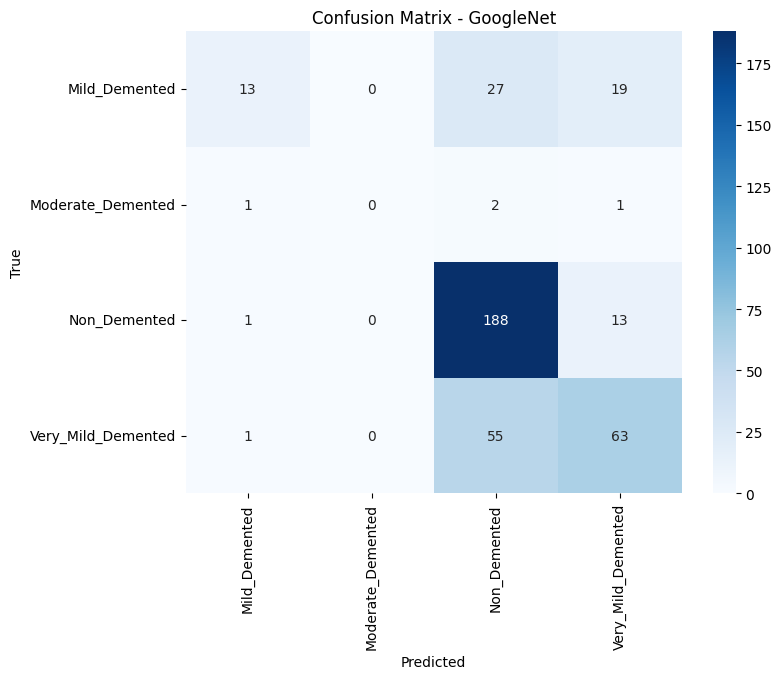

In [63]:
# Assuming you have already evaluated the GoogleNet model and obtained test_loss_googlenet, test_accuracy_googlenet
# Get the predicted probabilities from the model
y_pred_prob_googlenet = model_googlenet.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_googlenet = np.argmax(y_pred_prob_googlenet, axis=1)

# Convert true labels to class labels
y_true_googlenet = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_googlenet = confusion_matrix(y_true_googlenet, y_pred_googlenet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_googlenet, annot=True, cmap='Blues', fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix - GoogleNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# EfficientNet

In [41]:
from tensorflow.keras.applications import EfficientNetB0

# Create EfficientNetB0 model
model_efficientnet = EfficientNetB0(input_shape=(150, 150, 3), weights=None, classes=4)

In [105]:
# Compile the model
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_efficientnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 151, 151, 3)          0         ['normalization[0

## Efficient-Net Training...

In [44]:
# Training with EarlyStopping
history_efficientnet = model_efficientnet.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
140/140 [==============================] - 418s 3s/step - loss: 0.6447 - accuracy: 0.7542 - val_loss: 0.6666 - val_accuracy: 0.7168
Epoch 2/50
140/140 [==============================] - 414s 3s/step - loss: 0.3779 - accuracy: 0.8525 - val_loss: 0.5600 - val_accuracy: 0.7904
Epoch 3/50
140/140 [==============================] - 411s 3s/step - loss: 0.2812 - accuracy: 0.8975 - val_loss: 0.5051 - val_accuracy: 0.8314
Epoch 4/50
140/140 [==============================] - 413s 3s/step - loss: 0.2219 - accuracy: 0.9136 - val_loss: 0.3858 - val_accuracy: 0.8711
Epoch 5/50
140/140 [==============================] - 428s 3s/step - loss: 0.1859 - accuracy: 0.9315 - val_loss: 0.6293 - val_accuracy: 0.7852
Epoch 6/50
140/140 [==============================] - 459s 3s/step - loss: 0.1643 - accuracy: 0.9373 - val_loss: 0.7088 - val_accuracy: 0.8242
Epoch 7/50
140/140 [==============================] - 428s 3s/step - loss: 0.1506 - accuracy: 0.9438 - val_loss: 0.5255 - val_accuracy: 0.8158

In [45]:
# Evaluate the model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)

12/12 [==============================] - 6s 530ms/step - loss: 0.3148 - accuracy: 0.8880


In [46]:
print(f"Efficient-Net Test Accuracy: {test_accuracy_efficientnet}, Test Loss: {test_loss_efficientnet}")

Efficient-Net Test Accuracy: 0.8880208134651184, Test Loss: 0.314777135848999


12/12 [==============================] - 11s 552ms/step


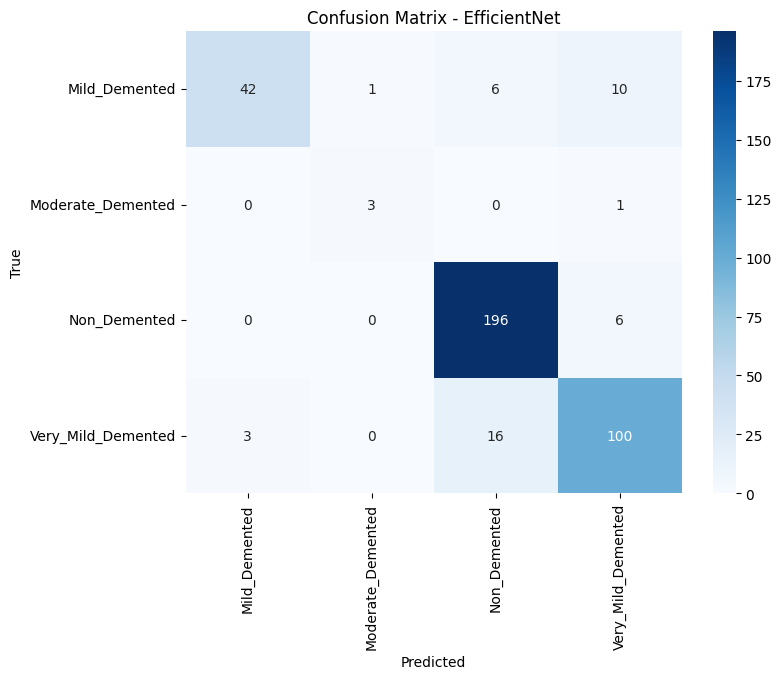

In [64]:

# Get the predicted probabilities from the model
y_pred_prob_efficientnet = model_efficientnet.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_efficientnet = np.argmax(y_pred_prob_efficientnet, axis=1)

# Convert true labels to class labels
y_true_efficientnet = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_efficientnet = confusion_matrix(y_true_efficientnet, y_pred_efficientnet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_efficientnet, annot=True, cmap='Blues', fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix - EfficientNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# DenseNet

In [47]:
from tensorflow.keras.applications import DenseNet121

# Create DenseNet model
model_densenet = DenseNet121(input_shape=(150, 150, 3), weights=None, classes=4)


## DenseNet Training...

In [50]:
# Training with EarlyStopping
history_densenet = model_densenet.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
140/140 [==============================] - 892s 6s/step - loss: 0.8414 - accuracy: 0.6004 - val_loss: 1.2514 - val_accuracy: 0.4915
Epoch 2/50
140/140 [==============================] - 901s 6s/step - loss: 0.7721 - accuracy: 0.6487 - val_loss: 2.0397 - val_accuracy: 0.5124
Epoch 3/50
140/140 [==============================] - 900s 6s/step - loss: 0.6598 - accuracy: 0.7129 - val_loss: 1.4575 - val_accuracy: 0.3743
Epoch 4/50
140/140 [==============================] - 894s 6s/step - loss: 0.5276 - accuracy: 0.7788 - val_loss: 1.8009 - val_accuracy: 0.4447


In [51]:
# Evaluate the model on the test set
test_loss_densenet, test_accuracy_densenet = model_densenet.evaluate(X_test, y_test)

12/12 [==============================] - 11s 946ms/step - loss: 1.3128 - accuracy: 0.5052


In [52]:
print(f"Dense-Net Test Accuracy: {test_accuracy_densenet}, Test Loss: {test_loss_densenet}")

Dense-Net Test Accuracy: 0.5052083134651184, Test Loss: 1.3128055334091187


12/12 [==============================] - 14s 950ms/step


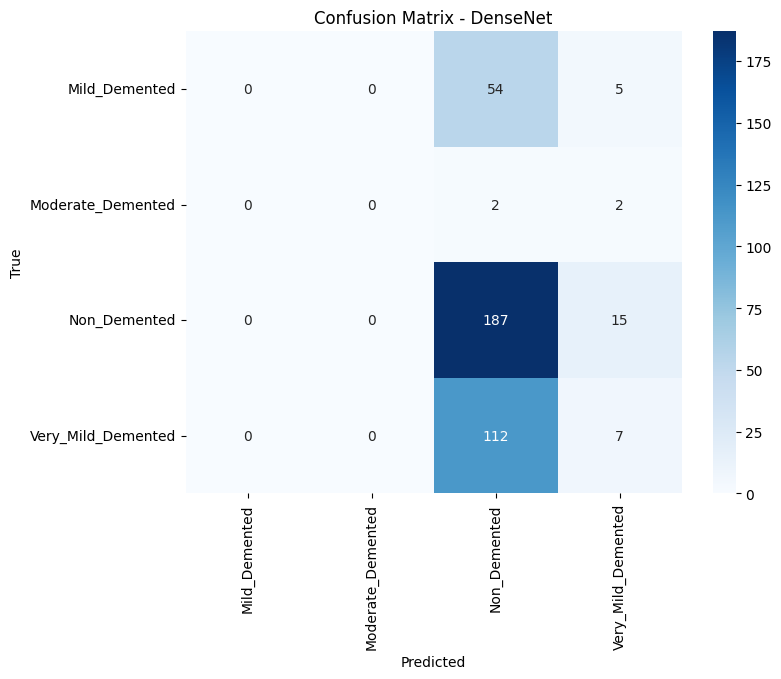

In [65]:

# Get the predicted probabilities from the model
y_pred_prob_densenet = model_densenet.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_densenet = np.argmax(y_pred_prob_densenet, axis=1)

# Convert true labels to class labels
y_true_densenet = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_densenet = confusion_matrix(y_true_densenet, y_pred_densenet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_densenet, annot=True, cmap='Blues', fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix - DenseNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Results ploting

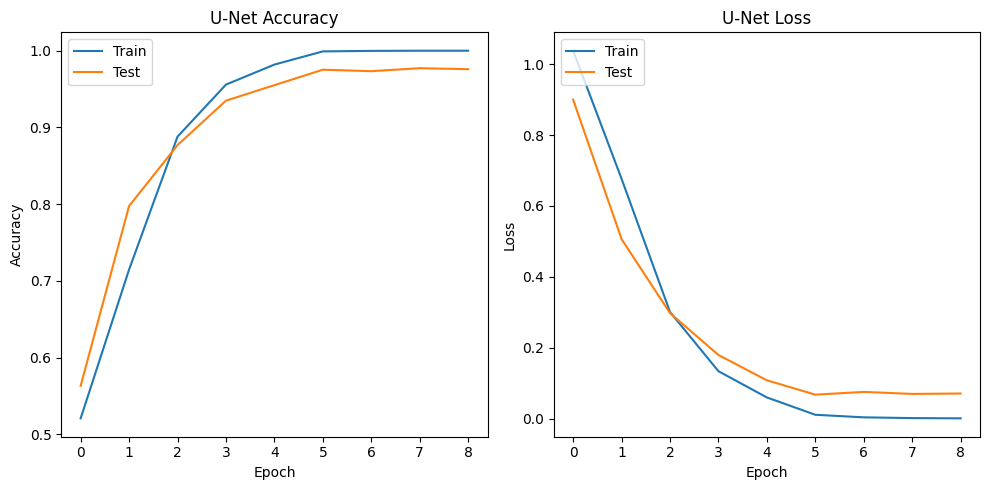

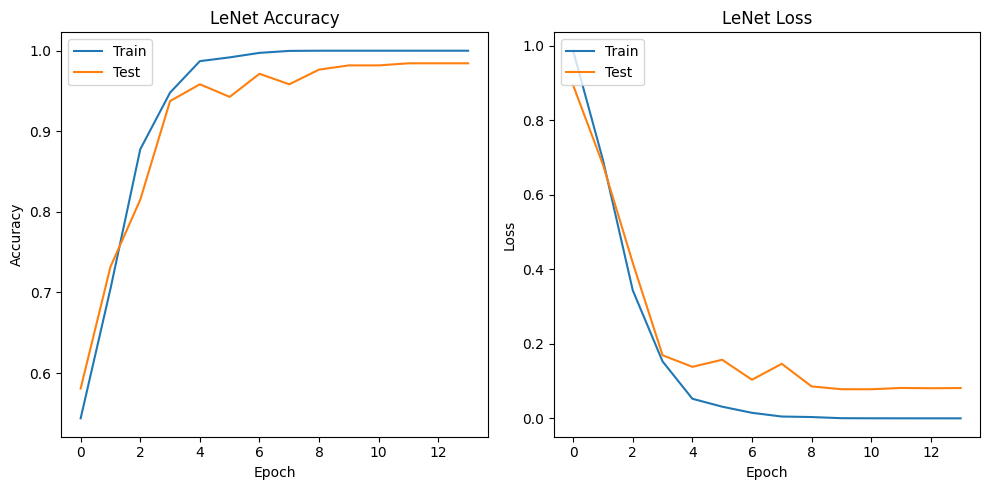

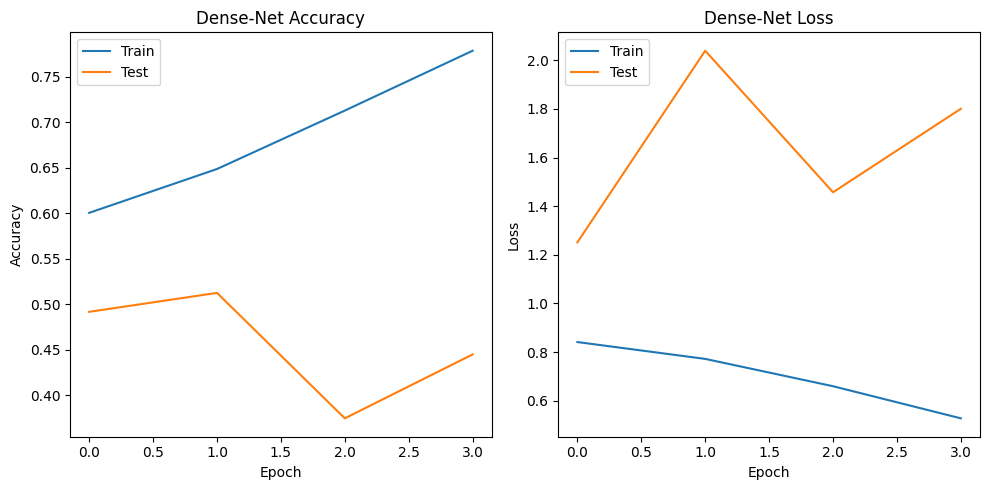

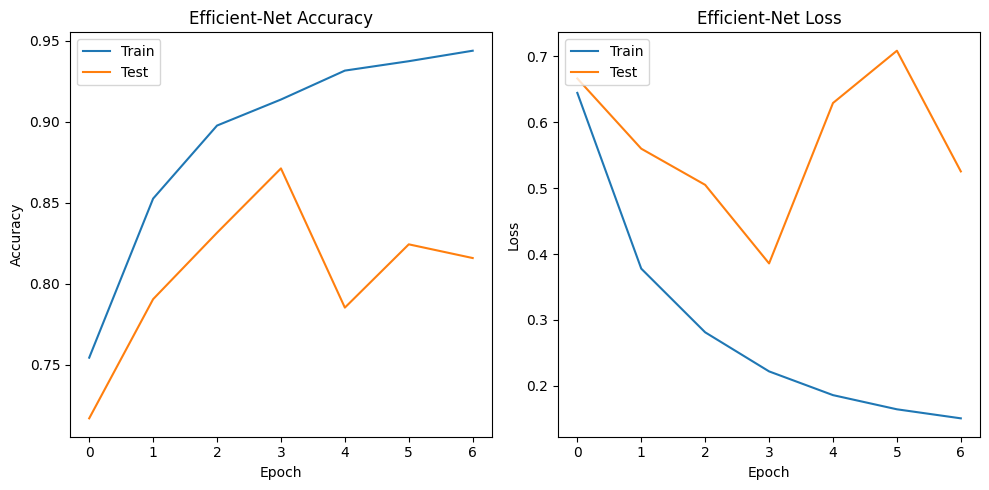

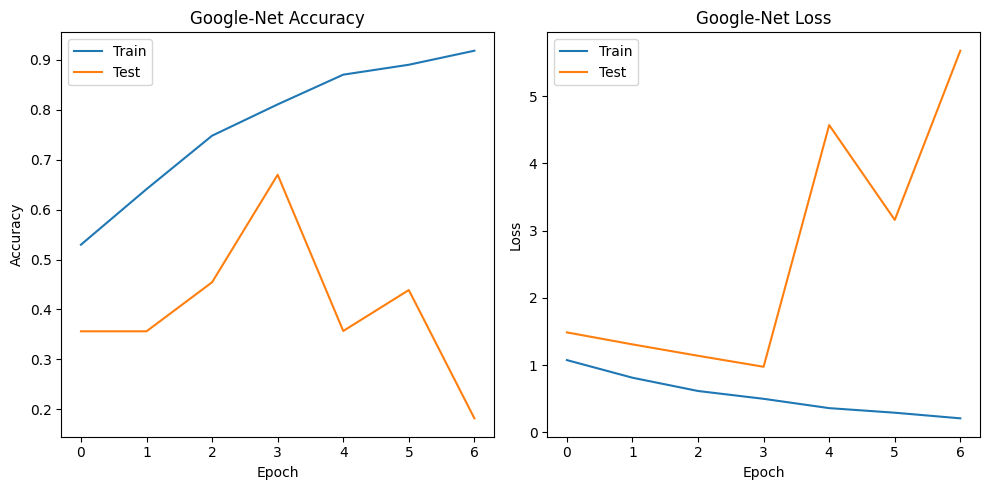

In [53]:
import matplotlib.pyplot as plt

# Define models and their histories (Assuming history_unet and history_lenet exist)
models = [history_unet, history_lenet, history_densenet, history_efficientnet, history_googlenet]  # Add more histories as needed

# Define model names for titles
model_names = ['U-Net', 'LeNet', 'Dense-Net', 'Efficient-Net', 'Google-Net']  # Add model names accordingly

# Plotting loop
for i, history in enumerate(models):
    plt.figure(figsize=(10, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_names[i]} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_names[i]} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.tight_layout()
    plt.savefig(f'{model_names[i]}_plot.png')
    plt.show()


# Results :

In [54]:
# Define models, their test accuracies, and test losses (assuming these lists are available)
models = ['UNet', 'LeNet', 'DenseNet', 'EfficientNet', 'GoogLeNet']  # Add your model names
test_accuracies = [test_accuracy_unet,
                   test_accuracy_lenet, 
                   test_accuracy_densenet,
                   test_accuracy_efficientnet,
                   test_accuracy_googlenet
                  ]  # Add test accuracies for each model
test_losses = [test_loss_unet,
                   test_loss_lenet, 
                   test_loss_densenet,
                   test_loss_efficientnet,
                   test_loss_googlenet]  # Add test losses for each model

In [55]:
# Create a DataFrame to store model information
import pandas as pd
data = {'Model': models, 'Test Accuracy': test_accuracies, 'Test Loss': test_losses}
df = pd.DataFrame(data)

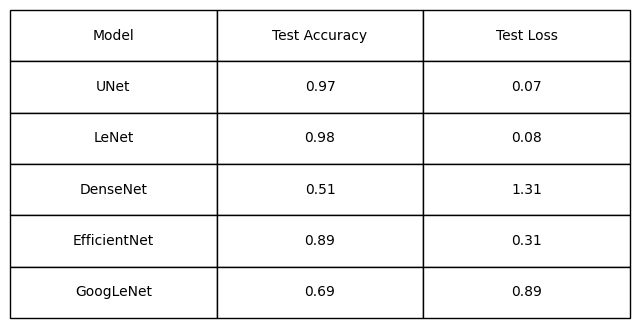

In [56]:
# Format the DataFrame to display values with two decimal points
df_formatted = df.round(2)

# Display the table with limited decimal points
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.table(cellText=df_formatted.values, colLabels=df_formatted.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])
plt.show()

1/1 [==============================] - 0s 35ms/step


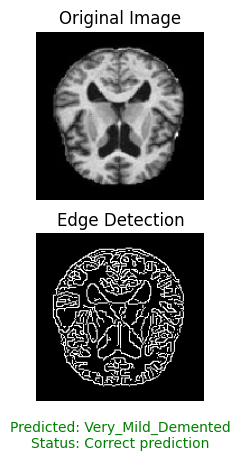

In [87]:
import cv2
import matplotlib.pyplot as plt

# Make prediction on the first test image
prediction = model_lenet.predict(np.expand_dims(X_test[0], axis=0))
predicted_class = np.argmax(prediction)

# Convert the original image to grayscale
gray_image = cv2.cvtColor(X_test[0], cv2.COLOR_RGB2GRAY)

# Normalize the grayscale image
normalized_gray_image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert the normalized grayscale image to 8-bit unsigned integer
normalized_gray_image_uint8 = normalized_gray_image.astype(np.uint8)

# Apply Canny edge detection with adjusted parameters
edges = cv2.Canny(normalized_gray_image_uint8, 50, 150)

# Display the original image
plt.subplot(2, 1, 1)
plt.imshow(X_test[0])
plt.title('Original Image')
plt.axis('off')

# Display the edge-detected image
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Check if the prediction is correct or incorrect
true_label = np.argmax(y_test[0])
if true_label == predicted_class:
    prediction_status = 'Correct prediction'
    text_color = 'green'
else:
    prediction_status = 'Incorrect prediction'
    text_color = 'red'

# Display the predicted class and prediction status below the images with more gap
plt.text(0.5, -0.2, 'Predicted: ' + CLASSES[predicted_class] + '\n' + 'Status: ' + prediction_status, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color=text_color)
plt.axis('off')

plt.show()
